In [8]:
from epilearn.models.SpatialTemporal import STGCN
from epilearn.data import UniversalDataset
from epilearn.utils import transforms
from epilearn.tasks.forecast import Forecast
import torch


In [10]:
data = torch.load("example.pt")
data.keys()

dict_keys(['features', 'graph', 'dynamic_graph', 'targets', 'states'])

In [19]:
print(f"Node Features[time steps, nodes, channels]: {data['features'].shape}")
print(f"Static Graph[nodes, nodes]: {data['graph'].shape}")
print(f"Dynamic Graph[time steps, nodes, nodes]: {data['dynamic_graph'].shape}")
print(f"Prediction Target[time steps, nodes]: {data['targets'].shape}")
print(f"Nodes States[time steps, nodes]: {data['states'].shape}")

Node Features[time steps, nodes, channels]: torch.Size([539, 47, 4])
Static Graph[nodes, nodes]: (47, 47)
Dynamic Graph[time steps, nodes, nodes]: torch.Size([539, 47, 47])
Prediction Target[time steps, nodes]: torch.Size([539, 47])
Nodes States[time steps, nodes]: torch.Size([539, 47])


In [20]:
node_features = data['features']
static_graph = data['graph']
dynamic_graph = data['dynamic_graph']
targets = data['targets']
node_status = data['states']

### creating dataset

In [ ]:
dataset = UniversalDataset()

In [2]:
# initialize settings
lookback = 12 # inputs size
horizon = 3 # predicts size

# load toy dataset
dataset = UniversalDataset()
dataset.load_toy_dataset()
# Adding Transformations
transformation = transforms.Compose({
                "features": [transforms.normalize_feat()],
                "graph": [transforms.normalize_adj()]})
dataset.transforms = transformation

# Initialize Task
task = Forecast(prototype=STGCN,
                dataset=None,
                lookback=lookback,
                horizon=horizon,
                device='cpu')

# Training
result = task.train_model(dataset=dataset,
                          loss='mse',
                          epochs=2,
                          batch_size=5,
                          permute_dataset=True)
# Evaluation
evaluation = task.evaluate_model()

spatial-temporal model loaded!


 50%|█████     | 1/2 [00:00<00:00,  1.25it/s]

######### epoch:0
Training loss: 0.08871386655335946
Validation loss: 0.1077234223484993


100%|██████████| 2/2 [00:01<00:00,  1.31it/s]




Final Training loss: 0.04690889029523298
Final Validation loss: 0.16668449342250824
Test MSE: 113925.8359375
Test MAE: 106.16334533691406
Test RMSE: 337.5290222167969
Test MSE: 113925.8359375
Test MAE: 106.16334533691406
Test RMSE: 337.5290222167969


In [6]:
evaluation['predictions'].shape

torch.Size([94, 47, 3])

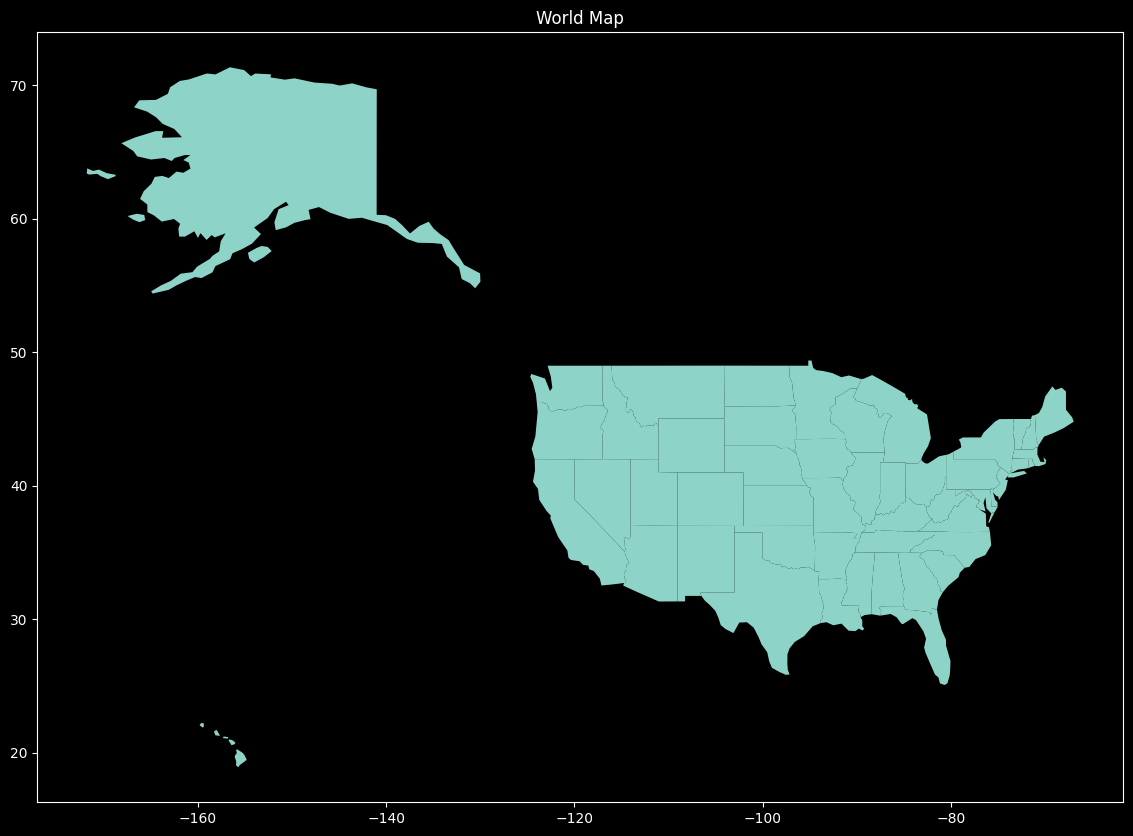

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace 'path_to_shapefile' with the actual path to the .shp file in your extracted directory
shapefile_path = 'tmp/ne_110m_admin_1_states_provinces.shp'

# Load the shapefile into a GeoDataFrame
world = gpd.read_file(shapefile_path)

# Plot the world map
world.plot(figsize=(15, 10))
plt.title('World Map')
plt.show()